**Text processing**
Outline
1. Upload data - done
2. Preprocessing - done (hopefully, some problems may occur later)
3. Tokenize - done
4. Model
5. Generate text

In [1]:
# libraries
library(tidyverse)
library(keras)
library(tensorflow)
library(tokenizers)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



Data

In [2]:
# upload book
valka_s_mloky0 <- read_lines("https://web2.mlp.cz/koweb/00/03/34/75/66/valka_s_mloky.txt")
# change encoding
valka_s_mloky <- iconv(valka_s_mloky0, from = "CP1250", to = "UTF-8")[11:1636]

In [3]:
valka_s_mloky[1:9]

[1] "KNIHA PRVNÍ"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
[2] ""                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
[3] "ANDRIAS SCHEUCHZERI"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
[4] ""                                                                                                                                                                                                                                     

Preprocessing

In [4]:
# split text into sentences
valka_s_mloky <- unlist(strsplit(valka_s_mloky, "(?<=[[:punct:]])\\s(?=[A-Z])", perl = T))

In [5]:
# delete special czech punctuation
valka_s_mloky <- valka_s_mloky %>% gsub("”","", .) %>% gsub("“","", .) %>% gsub("–","", .)
valka_s_mloky <- valka_s_mloky[!(valka_s_mloky %in% c("", " ", "!!"))]  # delete empty lines
# other punctuation is deleted by text_tokenizer using default settings 

Tokenization

In [6]:
vocab_size <- 4000  # maybe increase the vocab_size?

In [7]:
valka_s_mloky[1:10]

[1] "KNIHA PRVNÍ"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
 [2] "ANDRIAS SCHEUCHZERI"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
 [3] "KAPITOLA 1"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
 [4] "PODIVÍNSTVÍ KAPITÁNA VAN TOCHA"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [5] "Kdybyste hledali ostrůvek Tana Masa na mapě, našli byste jej právě na rovníku kousek na západ od Sumatry; ale kdybyste se zeptali na palubě lodi Kandong Bandoeng kapitána J. van Tocha, co to je tahle Tana Masa, před kterou právě zakotvil, nadával by chvíli a pak by vám řekl, že to je ta nejšpinavější díra v celých Sundských ostrovech, ještě mizernější než Tana Bala a přinejmenším tak zatracená jako Pini nebo Banjak; že jediný s odpuštěním člověk, který tam žije  nepočítáme-li ovšem tyhle všivé Bataky , je opilý obchodní agent, kříženec mezi Kubu a Portugalcem a ještě větší zloděj, pohan a prase než celý Kubu a celý běloch dohromady; a že je-li na světě něco zatraceného, pak je to zatracený život na téhle zatracené Tana Masa, pane."
 [6] "Načež byste se ho patrně zeptali, proč tu tedy spustil ty zatracené kotvy, jako by tu chtěl zůstat zatracené tři dny; i zafuněl by podrážděně a bručel by něco v tom smyslu, že Kandong Bandoeng by sem neplula jenom pro tu zatracenou kopru nebo palmový olej

In [8]:
tokenizer <- text_tokenizer(num_words = vocab_size, oov_token = "<OOV>")
valka_token <- fit_text_tokenizer(tokenizer, valka_s_mloky)
sequences <- texts_to_sequences(tokenizer, valka_s_mloky)

In [9]:
tokenizer$document_count
length(tokenizer$word_index)
tokenizer$word_index[1:20]
sequences[1:10]


[1] 4808

[1] 17196

$`<OOV>`
[1] 1

$a
[1] 2

$se
[1] 3

$to
[1] 4

$na
[1] 5

$v
[1] 6

$že
[1] 7

$je
[1] 8

$s
[1] 9

$ale
[1] 10

$tak
[1] 11

$do
[1] 12

$by
[1] 13

$jako
[1] 14

$co
[1] 15

$z
[1] 16

$k
[1] 17

$já
[1] 18

$o
[1] 19

$za
[1] 20

[[1]]
[1] 928 211

[[2]]
[1] 224 197

[[3]]
[1]  269 1051

[[4]]
[1] 3439  198   60  327

[[5]]
  [1] 1436 3440 1052  514  515    5    1 1801  407  356  152    5 3441  929    5
 [16] 1802   47    1   10 1436    3 3442    5 3443  144  579  580  198  128   60
 [31]  327   15    4    8 3444  514  515  163  334  152    1 3445   13  199    2
 [46]  177   13  104   48    7    4    8  155    1 3446    6 1437 3447  270   61
 [61]    1   83  514    1    2 3448   11    1   14    1   24    1    7  516    9
 [76]    1  122   79   41 1053    1   26  112 2353    1    1    8 3449 1054 2354
 [91]  581   75  659    2  816    2   61  492 3450 2355    2    1   83  288  659
[106]    2  288 2356 1438    2    7    8   26    5  245   64 3451  177    8    4
[121] 1225  344    5 3452 1439  514  515   34

[[6]]
 [1]  660  407    3  126  335 3442  153   44  134 2357   33 1439 3453   14   13
[16]   44  336 2358 1439  113  735   39 3454   13 2359    2  345   13   64    6
[31]   58 1226    7  579  580   13  317    1   46   29   44 3455    1   24 2360
[46] 2361    4  545 1055    2  817   21   58  104   77   52   34   18  129   50
[61] 1439 1803   34    2  109 2362   11 3456   34    2    1   22  246

[[7]]
 [1]    2 3445   13   11    1    2 1440   30    3 1804    5 3457   10    5  289
[16] 1441  661   61    1    1  198

[[8]]
 [1]   10 1436  216    1 1442 2363  198  128   60  327   31   22  345    2    1
[16]   29  164  217  407    3    1  181

[[9]]
[1]  736   52    5  384  346    7   22 1056    1

[[10]]
 [1]   68  126 1057   66    1   22 2364  737  582   11    3 3458   34    1   36
[16]   70    1   56  132    6 1805   70 3459    1   41 3460   22    1  105  218
[31]  170    1    3   21  930 1227

In [10]:
# the most frequent words in the text
tokenizer$word_counts %>% enframe(., name = "word", value = "n") %>%
  mutate(n = as.integer(n)) %>% arrange(desc(n))

word,n
<chr>,<int>
a,2314
se,1744
to,1051
na,1029
v,879
že,715
je,712
s,443
ale,399


In [11]:
# sequences of length 0 or 1
del_seq <- c()
join_seq <- c()
for (i in 1:length(sequences)){
    if (length(unlist(sequences[i])) == 0){del_seq <- c(del_seq, i)}
    if (length(unlist(sequences[i])) == 1){join_seq <- c(join_seq, i)}
}

In [12]:
# concat length 1 sequences with the subsequent sequence
for(i in join_seq){
     valka_s_mloky[i+1] <- paste(valka_s_mloky[i], valka_s_mloky[i+1])
     valka_s_mloky[i] <- ""
     sequences[i+1] <- list(c(unlist(sequences[i]), unlist(sequences[i+1])))
     sequences[i] <- ""
}

In [13]:
# delete length 0 sequences from sequences and book
valka_s_mloky <- valka_s_mloky[-c(join_seq, del_seq)]
sequences <- sequences[-c(join_seq, del_seq)]

In [14]:
# n-grams
n_gram_sequences <- c()

for (line in sequences){
    line_cor <- unlist(line)
    l <- length(line_cor)
    if(l < 6){
        n_gram_sequences <- append(n_gram_sequences, list(as.numeric(line_cor[1:l])))
    } else{
        for (i in 1:(l - 5)){
            n_gram_sequences <- append(n_gram_sequences, list(as.numeric(line_cor[i:(i+5)])))
        }
    }
}

n_gram_sequences[1:10]

[[1]]
[1] 928 211

[[2]]
[1] 224 197

[[3]]
[1]  269 1051

[[4]]
[1] 3439  198   60  327

[[5]]
[1] 1436 3440 1052  514  515    5

[[6]]
[1] 3440 1052  514  515    5    1

[[7]]
[1] 1052  514  515    5    1 1801

[[8]]
[1]  514  515    5    1 1801  407

[[9]]
[1]  515    5    1 1801  407  356

[[10]]
[1]    5    1 1801  407  356  152

In [15]:
# padding
#maxlen <- 0

#for (i in 1:length(n_gram_sequences)){
#    if (length(unlist(n_gram_sequences[i])) > maxlen) {
#        maxlen <- length(unlist(n_gram_sequences[i]))
#    }
#}

maxlen <- 6

In [16]:
padded <- pad_sequences(n_gram_sequences)
padded[1:10, ]

0,0,0,0,928,211
0,0,0,0,224,197
0,0,0,0,269,1051
0,0,3439,198,60,327
1436,3440,1052,514,515,5
3440,1052,514,515,5,1
1052,514,515,5,1,1801
514,515,5,1,1801,407
515,5,1,1801,407,356
5,1,1801,407,356,152


In [17]:
# preparation for model
labels <- padded[, ncol(padded)]
inputs <- padded[,(-ncol(padded))]
encoded_labels <- to_categorical(labels, num_classes = vocab_size)

4. Model

In [18]:
model <- keras_model_sequential()
# can play with number of dimensions
model <- model %>%
    layer_embedding(vocab_size, 256, input_length = maxlen - 1) %>%
    bidirectional(layer_gru(units = 128)) %>%
    layer_dense(vocab_size) %>%
    layer_activation('softmax')


In [19]:
summary(model)

Model: "sequential"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
embedding (Embedding)               (None, 5, 256)                  1024000     
________________________________________________________________________________
bidirectional (Bidirectional)       (None, 256)                     295680      
________________________________________________________________________________
dense (Dense)                       (None, 4000)                    1028000     
________________________________________________________________________________
activation (Activation)             (None, 4000)                    0           
Total params: 2,347,680
Trainable params: 2,347,680
Non-trainable params: 0
________________________________________________________________________________


In [20]:
## compile model
model %>% compile(
  optimizer = optimizer_adam(lr = 0.001),
  loss = 'categorical_crossentropy',
  metrics = list('accuracy')
)

In [21]:
## 50 epochs
## batch size 512
history <- model %>% fit(
  inputs,
  encoded_labels,
  epochs = 50,
  batch_size = 512,
  verbose = 0,
)


Final epoch (plot to see history):
    loss: 0.3597
accuracy: 0.947 

`geom_smooth()` using formula 'y ~ x'



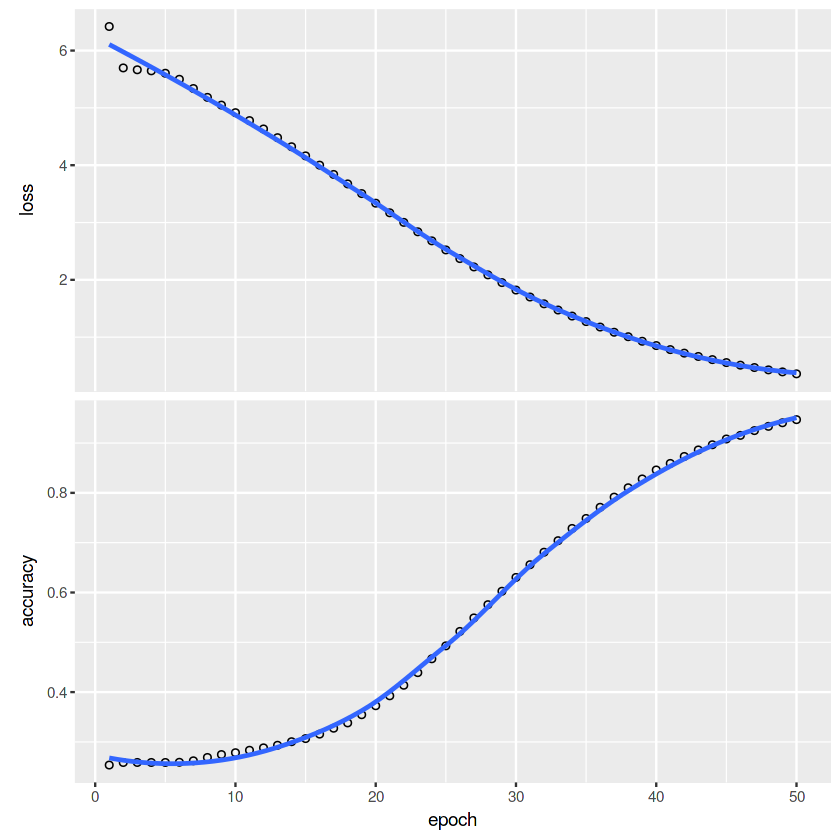

In [22]:
history
plot(history)

In [23]:
model %>% evaluate(inputs, encoded_labels)

loss  accuracy 
0.3017030 0.9581331

5. Generate text

In [24]:
word_index <- tokenizer$word_index

In [25]:
# text generating function
write_text <- function(seed_text, length = 20) {
  for (i in 1:length + 1) {
    token_list <- texts_to_sequences(tokenizer, list(seed_text))
    padded <- pad_sequences(token_list, maxlen = maxlen - 1)
    pred_probs <- model %>% predict(padded)
    
    output_arg <- sample(seq_len(length(pred_probs)), 1, prob = pred_probs)
    #output_arg <- which(pred_probs== max(pred_probs))
    
    output_word <- names(word_index)[output_arg]
    seed_text <- paste(seed_text, output_word)
    
  }
  return(seed_text)
}

In [26]:
write_text("mlok")

[1] "mlok zatím byl objevil a a šest beze má si svému a a příliš prefekt kde to zástupce se že teprve"

In [27]:
write_text("a")

[1] "a a a a a a a řeknu to a a tam to jen přerušil by který pane toho volám hráz"

In [28]:
write_text("buďte tak laskav")

[1] "buďte tak laskav bylo a a a a a a a kde to bondy a která za vylodit a ale abe já bondy"

In [29]:
write_text(" ")

[1] "  a a a a a a a a a a a a a a a a a a a a"

In [30]:
write_text("abcd")

[1] "abcd a očima a a a a a a a a a a a a a a a a a a"

In [31]:
write_text("pane")
write_text("sorry")
write_text("řekl")

[1] "pane toho zkoušky prsou hráz v můžeme čerti toch se a a a v měli s a a a a a"

[1] "sorry a byl nemůžeme a a a a a a a a a a a a a a a a a"

[1] "řekl takhle bych starosta sir ukázat pojedeme inteligenci sporů no kde to mloků kdy pro poruchy pro tu se že h"